# Исследовательский анализ данных

Данные по бронированию номеров. Вроде, [отсюда](https://www.kaggle.com/datasets/moro146/hotel-bookings).

Описания там нет. Так что мои предположения:  
|номер|колонка|non-null|тип|описание|
|--|--|--|--|--|
 |2|   lead_time           |            119390 non-null | int64 |  за сколько дней до прибытия был забронирован номер  |
| 20 | assigned_room_type   |           119390 non-null | object |  тип комнаты на самом деле занятый (а не зарезервированный)  |
| 23 | agent                  |         103050 non-null | Int64 |  агент по бронированию? Сотрудник?  |
| 24 | company                 |        6797 non-null   | Int64 |  ?  |
| 27 | adr                   |          119390 non-null | float64 |  средняя стоимость за ночь  |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

## Считывание данных

In [3]:
df = pd.read_csv('./data_ignored/hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df = df.convert_dtypes()

In [8]:
df.reservation_status_date = df.reservation_status_date.astype('datetime64[ns]')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  string        
 1   is_canceled                     119390 non-null  Int64         
 2   lead_time                       119390 non-null  Int64         
 3   arrival_date_year               119390 non-null  Int64         
 4   arrival_date_month              119390 non-null  string        
 5   arrival_date_week_number        119390 non-null  Int64         
 6   arrival_date_day_of_month       119390 non-null  Int64         
 7   stays_in_weekend_nights         119390 non-null  Int64         
 8   stays_in_week_nights            119390 non-null  Int64         
 9   adults                          119390 non-null  Int64         
 10  children                        119386 non-null  Int64  

In [13]:
df.dtypes.unique()

array([string[python], Int64Dtype(), Float64Dtype(), dtype('<M8[ns]')],
      dtype=object)

In [74]:
df.describe(include=int)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119386.0,119390.0,119390.0,119390.0,119390.0,119390.0,103050.0,6797.0,119390.0,119390.0,119390.0
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.10389,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798
min,0.0,0.0,2015.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0
25%,0.0,18.0,2016.0,16.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,62.0,0.0,0.0,0.0
50%,0.0,69.0,2016.0,28.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,179.0,0.0,0.0,0.0
75%,1.0,160.0,2017.0,38.0,23.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,270.0,0.0,0.0,1.0
max,1.0,737.0,2017.0,53.0,31.0,19.0,50.0,55.0,10.0,10.0,1.0,26.0,72.0,21.0,535.0,543.0,391.0,8.0,5.0


Пропуски значений только по агентам - они не всегда же есть.  
Ладно 19 уикэндов провести, но провести 50 рабочих недель без уикендов...  
Проверить еще до 55 взрослых, 10 детей и 10 младенцев в одном номере.  
required_car_parking_spaces до 8. Проверить. Хотя кто-то гостям мог заказать?  
какие номера ждали люди с большими days_in_waiting_list?

In [82]:
df.describe(include=float)

,adr
count,119390.0
mean,101.831122
std,50.53579
min,-6.38
25%,69.29
50%,94.575
75%,126.0
max,5400.0


In [ ]:
Отрицательный adr? Надо почистить.

In [84]:
df.describe(include='string')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


Не по всем посетителям есть страна.  
assigned_room_type на 2 больше, чем reserved_room_type

In [80]:
df.describe(include='datetime64')

,reservation_status_date
count,119390
mean,2016-07-30 00:24:47.883407104
min,2014-10-17 00:00:00
25%,2016-02-01 00:00:00
50%,2016-08-07 00:00:00
75%,2017-02-08 00:00:00
max,2017-09-14 00:00:00


## Создание колонок

In [25]:
# колонка полной даты
df['arrival_date'] = pd.to_datetime(
                            df.arrival_date_year.astype(str) 
                            + '-' 
                            + df.arrival_date_month 
                            + '-' + df.arrival_date_day_of_month.astype(str)
                        )

In [27]:
# номер месяца
df['arrival_date_month_number'] = df.arrival_date.dt.month

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  string        
 1   is_canceled                     119390 non-null  Int64         
 2   lead_time                       119390 non-null  Int64         
 3   arrival_date_year               119390 non-null  Int64         
 4   arrival_date_month              119390 non-null  string        
 5   arrival_date_week_number        119390 non-null  Int64         
 6   arrival_date_day_of_month       119390 non-null  Int64         
 7   stays_in_weekend_nights         119390 non-null  Int64         
 8   stays_in_week_nights            119390 non-null  Int64         
 9   adults                          119390 non-null  Int64         
 10  children                        119386 non-null  Int64  

## Обработка пропущенных значений

In [52]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
previous_bookings_not_canceled         0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
arrival_date                           0
reserved_room_type                     0
previous_cancellations                 0
is_canceled                            0
is_repeated_guest                      0
distribution_channel                   0
market_segment                         0
meal                                   0
babies          

In [55]:
df.isnull().mean().sort_values(ascending=False)

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
hotel                             0.000000
previous_bookings_not_canceled    0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
reservation_status                0.000000
reservation_status_date           0.000000
arrival_date                      0.000000
reserved_room_type                0.000000
previous_cancellations            0.000000
is_canceled                       0.000000
is_repeated_guest                 0.000000
distribution_channel              0.000000
market_segment                    0.000000
meal       

4 неизвестных значения в поле children заменю на 0:

In [59]:
df.children = df.children.fillna(0)

488-ми посетителям назначим страну 'UNK'nown:

In [65]:
df.country = df.country.fillna('UNK')

Отсутствие агента и компании - обычное дело, похоже. Обрабатывать отсутствие этих значений не буду.

## Удаление дубликатов

In [73]:
df[df.duplicated(keep=False)][60:70]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_date_month_number
634,Resort Hotel,0,8,2015,July,30,24,0,2,2,0,0,BB,BRA,Online TA,TA/TO,0,0,0,D,F,0,No Deposit,240,<NA>,0,Transient-Party,173.0,0,2,Check-Out,2015-07-26,2015-07-24,7
636,Resort Hotel,0,22,2015,July,30,24,0,2,2,0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,<NA>,0,Transient-Party,153.0,0,2,Check-Out,2015-07-26,2015-07-24,7
638,Resort Hotel,0,22,2015,July,30,24,0,2,2,0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,<NA>,0,Transient-Party,153.0,0,2,Check-Out,2015-07-26,2015-07-24,7
640,Resort Hotel,0,22,2015,July,30,24,0,2,2,0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,<NA>,0,Transient-Party,153.0,0,2,Check-Out,2015-07-26,2015-07-24,7
643,Resort Hotel,0,8,2015,July,30,24,0,2,2,0,0,BB,BRA,Online TA,TA/TO,0,0,0,D,F,0,No Deposit,240,<NA>,0,Transient-Party,173.0,0,2,Check-Out,2015-07-26,2015-07-24,7
644,Resort Hotel,1,67,2015,July,30,24,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,<NA>,0,Transient,135.0,0,1,Canceled,2015-07-06,2015-07-24,7
647,Resort Hotel,1,67,2015,July,30,24,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,<NA>,0,Transient,135.0,0,1,Canceled,2015-07-06,2015-07-24,7
654,Resort Hotel,0,55,2015,July,30,24,2,3,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,147,<NA>,0,Transient-Party,75.44,0,1,Check-Out,2015-07-29,2015-07-24,7
655,Resort Hotel,0,55,2015,July,30,24,2,3,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,147,<NA>,0,Transient-Party,75.44,0,1,Check-Out,2015-07-29,2015-07-24,7
660,Resort Hotel,0,25,2015,July,30,24,2,6,2,0,0,BB,PRT,Direct,TA/TO,0,0,0,D,D,0,No Deposit,240,<NA>,0,Transient,154.0,0,2,Check-Out,2015-08-01,2015-07-24,7


In [77]:
# количество и доля дубликатов в системе
df.duplicated().sum(), df.duplicated(keep=False).sum(), df.duplicated(keep=False).mean()

(31994, 40165, 0.3364184605075802)

In [58]:
df_duplicated = df[df.duplicated(keep=False)]

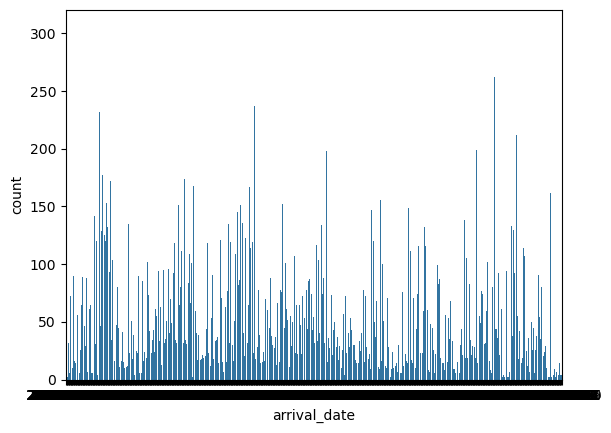

In [68]:
sns.countplot(data=df_duplicated, x='arrival_date');

Непонятно, что делать с дубликатами, не зная особенностей функционирования системы.  
Доля дублей - треть. Слишком много для ошибок? И борьбы с ошибками не видно: со временем они не снижаются кардинально. 
Многие дубли соседствуют, многие через одну-две строки друг от друга. Есть целые серии дублей. 
Может пуэрториканцы на свадьбу гостям номера заказали? Как часто люди путешествуют парой семей?  
Не буду удалять дубли.

In [3]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_date_month_number
22445,Resort Hotel,0,35,2016,March,13,22,0,4,2,0,0,BB,FIN,Direct,Direct,0,0,0,F,F,0,No Deposit,250,<NA>,0,Transient,95.5,1,0,Check-Out,2016-03-26,2016-03-22,3
60818,City Hotel,1,15,2016,November,48,22,2,5,2,0,0,SC,ZAF,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,9,<NA>,0,Transient,77.35,0,2,No-Show,2016-11-22,2016-11-22,11
51509,City Hotel,1,211,2016,May,21,20,0,2,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,6,<NA>,111,Transient,100.0,0,0,Canceled,2016-03-18,2016-05-20,5
60311,City Hotel,1,277,2016,November,46,7,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,<NA>,<NA>,0,Transient,100.0,0,0,Canceled,2016-04-04,2016-11-07,11
81380,City Hotel,0,7,2016,May,23,30,1,1,1,0,0,BB,FRA,Corporate,Corporate,1,0,2,A,A,0,No Deposit,91,<NA>,0,Transient,95.0,0,0,Check-Out,2016-06-01,2016-05-30,5


In [2]:
# экспресс
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('./data_ignored/hotel_bookings.csv')

df = df.convert_dtypes()

df.reservation_status_date = df.reservation_status_date.astype('datetime64[ns]')

df['arrival_date'] = pd.to_datetime(
                            df.arrival_date_year.astype(str) 
                            + '-' 
                            + df.arrival_date_month 
                            + '-' + df.arrival_date_day_of_month.astype(str)
                        )
df['arrival_date_month_number'] = df.arrival_date.dt.month

df.children = df.children.fillna(0)
df.country = df.country.fillna('UNK')